In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import itertools

TRAINING_DATA = './assignment/train_potus_by_county.csv'
# TODO: TRAINING VS VALIDATION DATA

In [ ]:
def loadData(file_in):
    with open(file_in) as f:
        fields = f.readline().strip().split(',')
        raw_array = np.array([line.split(',') for line in f.read().strip().split('\n')])
    raw_x, raw_y = np.hsplit(raw_array, [-1])
    return (fields, raw_x, raw_y)

#def numpyLoader(file_in):
#    raw_arr = np.genfromtxt(file_in, delimiter=',', names=True, max_rows=None)
#    print raw_arr.names
#    raw_x, raw_y = np.hsplit(raw_arr, [-1])
#    return (raw_x, raw_y)
#numpyLoader(TRAINING_DATA)

def normalize(arr):
    """Normalize columns by z-score (mean 0, STD 1)"""
    return (arr - arr.mean(axis=0))/arr.std(axis=0)

def minMax(arr):
    """Scale columns [0,1] (range 1, midrange 0.5)"""
    return (arr - arr.min(axis=0))/np.ptp(arr, axis=0)

def minus1to1(arr):
    """Scale columns [-1,1] (range 2, midrange 0)"""
    midrange = (arr.max(axis=0) + arr.min(axis=0))/2
    half_range = np.ptp(arr, axis=0)/2
    return (arr - midrange)/half_range


def preprocessX(x, processing_fn):
    return processing_fn(x.astype(np.float32))

def encodeY(y_field):
    """Encode output as 2-D vector representing vote"""
    output = map(float, [y_field == 'Barack Obama', y_field == 'Mitt Romney'])
    # check that data conforms to binary voting options
    assert sum(output) == 1
    return output

def encodeYs(ys):
    """Encode each output as 2-D vector representing vote"""
    D_OUTPUTS = {'Barack Obama': [1.,0.], 'Mitt Romney': [0.,1.]}
    return np.array([D_OUTPUTS[y] for y in ys])

In [ ]:
%matplotlib inline

fields, x_in, y_in = loadData(TRAINING_DATA)

#print np.apply_along_axis(encodeY, 0, y_in)

#print np.array([encodeY(field) for field in y])
#print x[:,:1]

x = preprocessX(x_in, normalize)
#x = preprocessX(x_in, minMax)
#x = preprocessX(x_in, minus1to1)

plt.plot(x)
#plt.scatter(map(encodeY, y_in))

In [ ]:
def datastream_pd(file_in, norm_fn=normalize):
    #import subprocess
    raw_wc = subprocess.check_output(["wc","-l",TRAINING_DATA])
    n_data = int(raw_wc.split()[0]) - 1 # subtract header
    
    n_training = int(0.7*n_data)
    
    reader = pd.read_csv(file_in, chunksize=n_training)
    raw_x = df.values[:,:-1]
    raw_y = df.values[:,-1:]
    return (norm_fn(raw_x).values.astype(np.float32),
            encodeYs(list(raw_y)))

In [ ]:
% matplotlib inline
def gaussianNorm(arr):
    """Normalize columns by z-score (mean 0, STD 1)"""
    return (arr - arr.mean(axis=0))/arr.std(axis=0)

def standardize(df, norm_fn, bound=None):
    return df.apply(norm_fn, axis=0)
    # TODO: bound ??
    #return df.filter(regex='^[^(Winner)]').apply(norm_fn, axis=0)
    #return df.select_dtypes(exclude=['object']).apply(norm_fn, axis=0)

def dataIO(file_in, norm_fn = gaussianNorm):
    df = pd.read_csv(file_in)
    #df.isnull().any() # >> all False
    
    # encode categorical output as one-hot
    global WINNERS; WINNERS = list(pd.get_dummies(df.Winner))
    df = pd.get_dummies(df, columns=['Winner'])
    
    # split into training & validation
    train = df.sample(frac=0.8)#, random_state=200)
    validate = df.drop(train.index)
    
    def normalize(data, norm_fn):
        xs_normed = standardize(data.filter(regex='^[^(Winner)]'), norm_fn)
        ys = data.filter(regex='^Winner')
        return pd.concat([xs_normed, ys], axis=1)
    
    #for data in (train, validate):
        # standardize inputs
        #xs_normed = standardizeInputs(data, norm_fn)
        # sanity check
        #print xs.mean(axis=0) # >> 0
        #print xs.std(axis=0) # >> 1
        #plt.plot(xs)
        #ys = data.filter(regex='^Winner')
        #pd.concat([xs_normed, ys], axis=1)
        
    return (normalize(data, norm_fn) for data in (train, validate))

train, validate = dataIO(TRAINING_DATA)

def minibatcherStream(df, size, max_iter = np.inf):
    REGEX = {'features': '^[^(Winner)]', 'targets': '^Winner'}
    len_ = len(df)
    reps = 0
    print 'bye'
    while True:
        if reps <= max_iter:
            print 'hi'
            for i in xrange(0, len_, size):
                try:
                    batched = df[i:i+size]
                except(IndexError):
                    batched = df[i:]
                yield tuple(batched.filter(regex=REGEX[k]).values
                            for k in ('features', 'targets'))
            print 'finished data! shuffling..'
            df = df.sample(frac=1).reset_index(drop=True) # shuffle
            reps += 1
        
stream = minibatcherStream(train, 500)#, max_iter=3)
stream2 = minibatcherStream(validate, 500)

In [107]:
#WINNERS = ['Barack Obama', 'Mitt Romney']
eye = np.eye(len(WINNERS))
one_hot_encoder = {k: eye[i] for i,k in enumerate(WINNERS)}

print one_hot_encoder

#df.Winner = df.Winner.map(lambda w: one_hot_encoder[w])

{'Mitt Romney': array([ 0.,  1.]), 'Barack Obama': array([ 1.,  0.])}


In [ ]:
#pd.get_dummies(df, columns=['Winner'])

encodedY = pd.get_dummies(df.Winner)

WINNERS = list(encodedY)
y_out = np.array([0,1])
WINNERS[np.argmax(y_out)]
#eye = np.eye(len(winners))
#ONE_HOT_DECODER = {eye[i]: v for i,v in enumerate(winners)}

#print ONE_HOT_DECODER

pd.get_dummies(df, columns=['Winner'])
df

In [ ]:
def loadData(file_in):
    with open(file_in) as f:
        fields = f.readline().strip().split(',')
        raw_array = npimpor.array([line.split(',') for line in f.read().strip().split('\n')])
    raw_x, raw_y = np.hsplit(raw_array, [-1])
    return (fields, raw_x, raw_y)

def datastream_pd_normalize_by_minibatch(file_in, batch_size = 50):
    reader = pd.read_csv(file_in, chunksize=batch_size, iterator=True)
    for minibatch in itertools.cycle(reader):
        raw_x = df.values[:,:-1].astype(np.float32)
        raw_y = df.values[]
        yield (raw_x, encodeYs(list(raw_y)))


def datastream_pd_normalize_by_minibatch(file_in, batch_size = 50):
    reader = pd.read_csv(file_in, chunksize=batch_size, iterator=True)
    for minibatch in itertools.cycle(reader):
        raw_x = df.values[:,:-1].astype(np.float32)
        raw_y = df.values[]
        yield (raw_x, encodeYs(list(raw_y)))



def datastream(file_in, batch_size = 50):
    with open(file_in) as f:
        fields = f.readline().strip().split(',')
        iter_raw = (line.split(',') for line in f.read().strip().split('\n'))
   #iterdata = iter(raw)

        minibatcher = itertools.cycle(itertools.islice(iter_raw, batch_size))
        while True:
            minibatch = minibatcher.next()
            print minibatch
            raw_x, raw_y = np.hsplit(np.array(minibatch), [-1])
            yield (raw_x, encodeYs(raw_y))


def normalize_gaussian(arr):
    """Normalize columns by z-score (mean 0, STD 1)"""
    return (arr - arr.mean(axis=0))/arr.std(axis=0)

def preprocessX(x, processing_fn):
    return processing_fn(x.astype(np.float32))

def encodeYs(ys):
    """Encode each output as 2-D vector representing vote"""
    D_OUTPUTS = {'Barack Obama': [1.,0.], 'Mitt Romney': [0.,1.]}
    return np.array([D_OUTPUTS[y] for y in ys])

# TODO: load and clean/normalize data
FEATURES = 8 #len(fields) - 1 # all but classification

def preprocessAndStream(datafile):
    # TODO: chunk into training / validation sets
    PERC_TRAINING = 0.7 # rest validation
    n_minibatch = 50
    return

In [ ]:
HYPERPARAMS = {'learning_rate': 0.1,
               'n_minibatch': 1,
               'n_hidden': 1, # n hidden layers
               'dropout': 0}

LAYERS = [('input', [n_minibatch, FEATURES]), # (name, shape)
         ('hidden_1'), []]


class model():
    def __init__(self, learning_rate=None, n_minibatch=None, n_hidden=None, dropout=None):
        self.learning_rate = learning_rate
        self.n_minibatch = n_minibatch
        self.n_hidden = n_hidden
        self.dropout = dropout
        
        self.buildNN()
        
        with tf.Session() as sesh:
            sesh.run(tf.initialize_all_variables())
            state, out, cost = sesh.run()
        
        
        
    def buildNN(self):
        # input layer
        x = tf.placeholder(tf.float32, [n_minibatch, FEATURES])
        
        
        # hidden layer/s
        
        
        # output layer
        y_ = tf.placeholder(tf.float32, [n_minibatch, 2])
        


class fullyConnectedLayer():
    def __init__(self, input_size, output_size):
        # initialize weights and biases
        self.w = tf.Variable(tf.random_normal((input_size, output_size)),
                            trainable=True)
        self.b = tf.Variable(tf.zeros([output_size]), trainable=True)
    def build(self, x_in, activation=tf.sigmoid):
        return activation(tf.nn.xw_plus_b(x_in, self.w, self.b))


# single input vector with bias
#x_with_h = tf.concat(1, )

In [ ]:
# input columns minus output
FEATURES = len(fields) - 1

n_minibatch = 1
n_hidden = 1

x = tf.placeholder(tf.float32, [n_minibatch, FEATURES])
y_ = tf.placeholder(tf.float32, [n_minibatch, 2])

layers = [('input', [n_minibatch, FEATURES], [n_minibatch, FEATURES]) + [('hidden_{}'.format(i), n_minibatch, FEATURES)] + [('output', FEATURES, 2)]

for i in xrange(1 + n_hidden): # n_layers = input + hidden
    

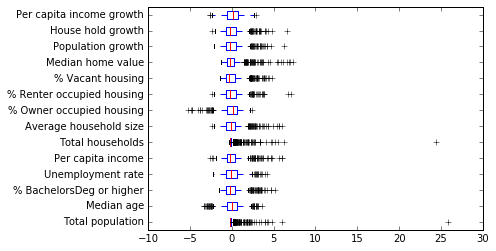

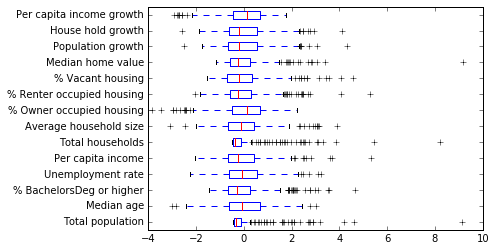

In [8]:
% matplotlib inline
from build_model import OUTFILES, DataIO, gaussianNorm

df = pd.read_csv(TRAINING_DATA)
train, validate = (pd.read_csv(OUTFILES[k]).filter(regex='^[^Winner]') for k in ('train', 'validate'))

plt.figure()
train.plot(kind='box', vert=False)
validate.plot(kind='box', vert=False)

In [20]:
df.isnull().any()

Total population             False
Median age                   False
% BachelorsDeg or higher     False
Unemployment rate            False
Per capita income            False
Total households             False
Average household size       False
% Owner occupied housing     False
% Renter occupied housing    False
% Vacant housing             False
Median home value            False
Population growth            False
House hold growth            False
Per capita income growth     False
Winner                       False
dtype: bool